In [66]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%matplotlib inline

In [67]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/'
os.listdir(working_dir)

['example_roi_Artifacts.pdf',
 'example_roi_Adjacent.pdf',
 'zika_vs_mock_average_profiles_Adjacent.pdf',
 'ventricle_size_vs_sox2_freq.pdf',
 'example_roi_Surface-DN.pdf',
 'zika_vs_mock_average_profiles_Surface-DN.pdf',
 'zika_vs_mock_average_profiles_Surface-TBR1.pdf',
 'zika_vs_mock_average_profiles_Artifacts.pdf',
 'cyto_zika_umap.pdf',
 'example_roi_DN.pdf',
 'cyto_profiles_combined.npy',
 'Zika',
 'average_profile_DN.pdf',
 'analysis.csv',
 'cyto_clusters_umap.pdf',
 'umap_zika_vs_mock.pdf',
 'average_profile_Artifacts.pdf',
 'volcano_plot_zika.pdf',
 'average_profile_Surface-DN.pdf',
 'model_zikv.umap',
 'cyto_profiles_combined_samples.npy',
 'clustermap_zika_hits.pdf',
 'example_roi_Surface-TBR1.pdf',
 'Zika_mock',
 'cyto_labels_combined.npy',
 'mean_SOX2_ventricle_distance.pdf',
 'zika_vs_mock_average_profiles_DN.pdf',
 'average_profile_Surface-TBR1.pdf',
 'zikv_with_FC.xlsx',
 'average_profile_Adjacent.pdf',
 'combined_features.xlsx']

In [68]:
df = pd.read_excel(os.path.join(working_dir, 'combined_features.xlsx'), index_col=0)
# df = df.set_index('feature')
df.head()

,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP140_642LP50,20190625_15_22_42_AA_ef24-zika2_488LP20_561LP140_642LP50,20190625_16_04_10_AA_ef24-zika3_488LP18_561LP140_642LP50,20190625_16_22_54_AA_ef24-zika4_488LP18_561LP140_642LP50,20190625_16_31_09_AA_ef24-zika5_488LP14_561LP140_642LP50,20190625_17_15_27_AA_ef24-zika6_488LP25_561LP140_642LP50,20190625_12_18_15_AA_ef24-ctrl1_488LP14_561LP140_642LP50,20190625_12_38_41_AA_ef24-ctrl2_488LP13_561LP140_642LP50,20190625_13_00_22_AA_ef24-ctrl3_488LP15_561LP140_642LP50,20190625_13_54_38_AA_ef24-ctrl4_488LP14_561LP140_642LP50,20190625_14_13_45_AA_ef24-ctrl5_488LP13_561LP140_642LP50,20190702_18_25_23_eF25_M1_488LP18_561LP160_642LP50,20190702_18_48_11_eF25_M2_488LP18_561LP160_642LP50,20190702_19_09_04_eF25_M3_488LP20_561LP160_642LP50,20190703_14_04_39_eF25_M4_488LP20_561LP160_642LP50,20190703_14_49_48_eF25_M5_488LP20_561LP160_642LP50
dataset,,,,,,,,,,,,,,,,
"DN nbrhd, sox2 count",15.0,32.0,13.0,8.0,15.0,24.0,18.0,14.0,13.0,20.0,24.0,14.0,13.0,16.0,21.0,252.0
"DN nbrhd, tbr1 count",3.0,4.0,2.0,3.0,0.0,8.0,5.0,2.0,4.0,2.0,7.0,3.0,5.0,5.0,10.0,179.0
"DN nbrhd, dn count",81521.0,160178.0,50588.0,96575.0,17976.0,80091.0,122841.0,133203.0,238463.0,19355.0,84802.0,121430.0,125783.0,27026.0,106831.0,19390.0
"SOX2 nbrhd, sox2 count",743220.0,165038.0,115704.0,99024.0,249788.0,55425.0,215315.0,432520.0,550232.0,239200.0,259107.0,806061.0,863292.0,172443.0,618511.0,739997.0
"SOX2 nbrhd, tbr1 count",2419.0,626.0,795.0,218.0,1292.0,313.0,777.0,999.0,1470.0,959.0,709.0,1244.0,2341.0,908.0,1141.0,6922.0


In [69]:
analysis = pd.read_csv(os.path.join(working_dir, 'analysis.csv'), index_col=0)

# Get column names for renaming
original_names = [f'{t}/{f}/' for t, f in zip(analysis['type'], analysis.index)]

# Swap Zika 1 for Ctrl 1, and Zika 5 for Ctrl 5
z1_idx = ['zika1' in p for p in analysis.index].index(True)
z5_idx = ['zika5' in p for p in analysis.index].index(True)
c1_idx = ['ctrl1' in p for p in analysis.index].index(True)
c5_idx = ['ctrl5' in p for p in analysis.index].index(True)

analysis['type'].iloc[z1_idx] = 'Zika_mock'
analysis['type'].iloc[z5_idx] = 'Zika_mock'
analysis['type'].iloc[c1_idx] = 'Zika'
analysis['type'].iloc[c5_idx] = 'Zika'

# Get new names
new_names = []
zika_idx = 1
mock_idx = 1
for t in analysis['type']:
    if t == 'Zika':
        new_names.append(f'{t}{zika_idx}')
        zika_idx += 1
    elif t == 'Zika_mock':
        new_names.append(f'{t}{mock_idx}')
        mock_idx += 1

names = [name.split('/')[1] for name in original_names]
rename = dict(zip(names, new_names))
rename

{'20190625_14_48_13_AA_ef24-zika1_488LP15_561LP140_642LP50': 'Zika_mock1',
 '20190625_15_22_42_AA_ef24-zika2_488LP20_561LP140_642LP50': 'Zika1',
 '20190625_16_04_10_AA_ef24-zika3_488LP18_561LP140_642LP50': 'Zika2',
 '20190625_16_22_54_AA_ef24-zika4_488LP18_561LP140_642LP50': 'Zika3',
 '20190625_16_31_09_AA_ef24-zika5_488LP14_561LP140_642LP50': 'Zika_mock2',
 '20190625_17_15_27_AA_ef24-zika6_488LP25_561LP140_642LP50': 'Zika4',
 '20190625_12_18_15_AA_ef24-ctrl1_488LP14_561LP140_642LP50': 'Zika5',
 '20190625_12_38_41_AA_ef24-ctrl2_488LP13_561LP140_642LP50': 'Zika_mock3',
 '20190625_13_00_22_AA_ef24-ctrl3_488LP15_561LP140_642LP50': 'Zika_mock4',
 '20190625_13_54_38_AA_ef24-ctrl4_488LP14_561LP140_642LP50': 'Zika_mock5',
 '20190625_14_13_45_AA_ef24-ctrl5_488LP13_561LP140_642LP50': 'Zika6',
 '20190702_18_25_23_eF25_M1_488LP18_561LP160_642LP50': 'Zika_mock6',
 '20190702_18_48_11_eF25_M2_488LP18_561LP160_642LP50': 'Zika_mock7',
 '20190702_19_09_04_eF25_M3_488LP20_561LP160_642LP50': 'Zika_mock8'

In [70]:
df = df.rename(columns=rename)
df.head()

,Zika_mock1,Zika1,Zika2,Zika3,Zika_mock2,Zika4,Zika5,Zika_mock3,Zika_mock4,Zika_mock5,Zika6,Zika_mock6,Zika_mock7,Zika_mock8,Zika_mock9,Zika_mock10
dataset,,,,,,,,,,,,,,,,
"DN nbrhd, sox2 count",15.0,32.0,13.0,8.0,15.0,24.0,18.0,14.0,13.0,20.0,24.0,14.0,13.0,16.0,21.0,252.0
"DN nbrhd, tbr1 count",3.0,4.0,2.0,3.0,0.0,8.0,5.0,2.0,4.0,2.0,7.0,3.0,5.0,5.0,10.0,179.0
"DN nbrhd, dn count",81521.0,160178.0,50588.0,96575.0,17976.0,80091.0,122841.0,133203.0,238463.0,19355.0,84802.0,121430.0,125783.0,27026.0,106831.0,19390.0
"SOX2 nbrhd, sox2 count",743220.0,165038.0,115704.0,99024.0,249788.0,55425.0,215315.0,432520.0,550232.0,239200.0,259107.0,806061.0,863292.0,172443.0,618511.0,739997.0
"SOX2 nbrhd, tbr1 count",2419.0,626.0,795.0,218.0,1292.0,313.0,777.0,999.0,1470.0,959.0,709.0,1244.0,2341.0,908.0,1141.0,6922.0


In [71]:
column_headers = list(df.keys())
ctrl_headers = [h for h in column_headers if 'mock' in h]
zikv_headers = [h for h in column_headers if not 'mock' in h]

df_ctrl = df[ctrl_headers]
df_zikv = df[zikv_headers]

df_ctrl.head()

,Zika_mock1,Zika_mock2,Zika_mock3,Zika_mock4,Zika_mock5,Zika_mock6,Zika_mock7,Zika_mock8,Zika_mock9,Zika_mock10
dataset,,,,,,,,,,
"DN nbrhd, sox2 count",15.0,15.0,14.0,13.0,20.0,14.0,13.0,16.0,21.0,252.0
"DN nbrhd, tbr1 count",3.0,0.0,2.0,4.0,2.0,3.0,5.0,5.0,10.0,179.0
"DN nbrhd, dn count",81521.0,17976.0,133203.0,238463.0,19355.0,121430.0,125783.0,27026.0,106831.0,19390.0
"SOX2 nbrhd, sox2 count",743220.0,249788.0,432520.0,550232.0,239200.0,806061.0,863292.0,172443.0,618511.0,739997.0
"SOX2 nbrhd, tbr1 count",2419.0,1292.0,999.0,1470.0,959.0,1244.0,2341.0,908.0,1141.0,6922.0


Make volcano plots

In [72]:
ctrl_means = df_ctrl.mean(axis=1)
zikv_means = df_zikv.mean(axis=1)

fc = zikv_means / ctrl_means
log2fc = np.log2(fc)

log2fc.head()

dataset
DN nbrhd, sox2 count     -0.986602
DN nbrhd, tbr1 count     -2.139763
DN nbrhd, dn count        0.154647
SOX2 nbrhd, sox2 count   -1.836741
SOX2 nbrhd, tbr1 count   -1.781222
dtype: float64

In [73]:
ts = []
pvals = []

for feature in tqdm(df_ctrl.index, total=len(df_ctrl)):
    a = df_ctrl.loc[feature]
    b = df_zikv.loc[feature]
    t, pval = ttest_ind(a, b)
    ts.append(t)
    pvals.append(pval)

t = np.asarray(ts)
pval = np.asarray(pvals)

logp = -np.log10(pval)

In [21]:
np.log2(1.3)

0.37851162325372983

24


/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


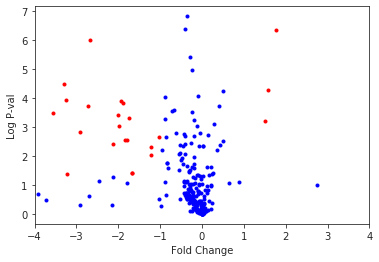

In [92]:
idx_fc = np.where(np.abs(log2fc) > 1)[0]
idx_pval = np.where(pval < 0.05)[0]

idx_keep = np.intersect1d(idx_fc, idx_pval)
idx_drop = np.setdiff1d(np.arange(len(pval)), idx_keep)

print(len(idx_keep))

plt.plot(log2fc[idx_drop], logp[idx_drop], 'b.')
plt.plot(log2fc[idx_keep], logp[idx_keep], 'r.')
plt.xlabel('Fold Change')
plt.ylabel('Log P-val')
plt.xlim([-4, 4])
plt.show()

In [38]:
for i, f in enumerate(df_ctrl.index):
    print(i, f)

# Look at features
# 157 - Start of Cyto
# 217 - Start of Whole Org

0 DN nbrhd, sox2 count
1 DN nbrhd, tbr1 count
2 DN nbrhd, dn count
3 SOX2 nbrhd, sox2 count
4 SOX2 nbrhd, tbr1 count
5 SOX2 nbrhd, dn count
6 TBR1 nbrhd, sox2 count
7 TBR1 nbrhd, tbr1 count
8 TBR1 nbrhd, dn count
9 DP nbrhd, sox2 count
10 DP nbrhd, tbr1 count
11 DP nbrhd, dn count
12 MidTBR1 nbrhd, sox2 count
13 MidTBR1 nbrhd, tbr1 count
14 MidTBR1 nbrhd, dn count
15 MidSOX2 nbrhd, sox2 count
16 MidSOX2 nbrhd, tbr1 count
17 MidSOX2 nbrhd, dn count
18 MidInter nbrhd, sox2 count
19 MidInter nbrhd, tbr1 count
20 MidInter nbrhd, dn count
21 DN nbrhd fraction
22 SOX2 nbrhd fraction
23 TBR1 nbrhd fraction
24 DP nbrhd fraction
25 MidTBR1 nbrhd fraction
26 MidSOX2 nbrhd fraction
27 MidInter nbrhd fraction
28 TBR1 / SOX2 ratio
29 MidTBR1 / MidSOX2 ratio
30 MidInter / DN ratio
31 DN nbrhd, eq diam mean
32 DN nbrhd, eq diam stdev
33 SOX2 nbrhd, eq diam mean
34 SOX2 nbrhd, eq diam stdev
35 TBR1 nbrhd, eq diam mean
36 TBR1 nbrhd, eq diam stdev
37 DP nbrhd, eq diam mean
38 DP nbrhd, eq diam stdev
39

0 DN nbrhd fraction DN nbrhd fraction
1 MidSOX2 nbrhd fraction MidSOX2 nbrhd fraction
2 SOX2 nbrhd, sox2 count SOX2 nbrhd, sox2 count
3 TBR1 nbrhd, tbr1 count TBR1 nbrhd, tbr1 count
4 organoid volume (mm3) organoid volume (mm3)
5 ventricle volume mean (um3) ventricle volume mean (um3)
6 Adjacent cytoarchitecture fraction Adjacent cytoarchitecture fraction
7 ave. Surface-DN profile, tbr1 count ave. Surface-DN profile, tbr1 count


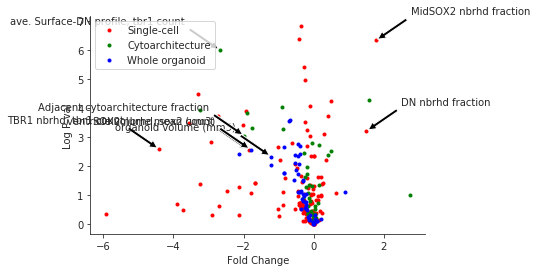

In [91]:
cyto_start = 157
wholeorg_start = 207

hits_show = [
    'DN nbrhd fraction',
    'MidSOX2 nbrhd fraction',
    'SOX2 nbrhd, sox2 count',
    'TBR1 nbrhd, tbr1 count',

    'organoid volume (mm3)',
    'ventricle volume mean (um3)',
    'Adjacent cytoarchitecture fraction',
    'ave. Surface-DN profile, tbr1 count',
]

sns.set_style('ticks')

singlecell_idx = np.arange(cyto_start)
cyto_idx = np.arange(cyto_start, wholeorg_start)
wholeorg_idx = np.arange(wholeorg_start, len(df_ctrl.index))

fig, ax = plt.subplots()

plt.plot(log2fc[singlecell_idx], logp[singlecell_idx], 'r.', label='Single-cell')
plt.plot(log2fc[cyto_idx], logp[cyto_idx], 'g.', label='Cytoarchitecture')
plt.plot(log2fc[wholeorg_idx], logp[wholeorg_idx], 'b.', label='Whole organoid')

for k, h in enumerate(hits_show):
    i = np.where(np.asarray([f == h for f in df.index]))[0][0]
    x = log2fc[i]
    y = logp[i]
    if x < 0:
        xytext = (x-1, y+1)
        halign = 'right'
    else:
        xytext = (x+1, y+1)
        halign = 'left'
    print(k,h,  df.index[i])
    ax.annotate(h, xy=(x, y),  xycoords='data',
                xytext=xytext, textcoords='data',
                arrowprops=dict(facecolor='black', shrink=0.05, width=3, headwidth=8, headlength=8),
                horizontalalignment=halign, verticalalignment='center',
                )

# plt.plot([0, 0], [0, 7], 'k-')
plt.xlabel('Fold Change')
plt.ylabel('Log P-val')
plt.legend()
# plt.xlim([-4, 4])
# plt.ylim([0, 3.5])
sns.despine()

plt.savefig(os.path.join(working_dir, 'volcano_plot_zika.pdf'), bbox_inches='tight')
plt.show()

Save dataframe with t-test results

In [83]:
# This will modify df

feature_scale = cyto_start * ['Single-cell'] + (wholeorg_start - cyto_start) * ['Cytoarchitecture'] + (len(df) - wholeorg_start) * ['Whole organoid']
df['scale'] = feature_scale

df['FC'] = fc
df['t'] = t
df['pval'] = pval
df['log2FC'] = log2fc
df['logp'] = logp

df.head()

,Zika_mock1,Zika1,Zika2,Zika3,Zika_mock2,Zika4,Zika5,Zika_mock3,Zika_mock4,Zika_mock5,...,Zika_mock7,Zika_mock8,Zika_mock9,Zika_mock10,scale,FC,t,pval,log2FC,logp
dataset,,,,,,,,,,,,,,,,,,,,,
"DN nbrhd, sox2 count",15.0,32.0,13.0,8.0,15.0,24.0,18.0,14.0,13.0,20.0,...,13.0,16.0,21.0,252.0,Single-cell,0.504665,0.626367,0.541153,-0.986602,0.266680
"DN nbrhd, tbr1 count",3.0,4.0,2.0,3.0,0.0,8.0,5.0,2.0,4.0,2.0,...,5.0,5.0,10.0,179.0,Single-cell,0.226917,0.716582,0.485415,-2.139763,0.313886
"DN nbrhd, dn count",81521.0,160178.0,50588.0,96575.0,17976.0,80091.0,122841.0,133203.0,238463.0,19355.0,...,125783.0,27026.0,106831.0,19390.0,Single-cell,1.113149,-0.317676,0.755419,0.154647,0.121812
"SOX2 nbrhd, sox2 count",743220.0,165038.0,115704.0,99024.0,249788.0,55425.0,215315.0,432520.0,550232.0,239200.0,...,863292.0,172443.0,618511.0,739997.0,Single-cell,0.279953,3.607634,0.002855,-1.836741,2.544407
"SOX2 nbrhd, tbr1 count",2419.0,626.0,795.0,218.0,1292.0,313.0,777.0,999.0,1470.0,959.0,...,2341.0,908.0,1141.0,6922.0,Single-cell,0.290937,1.841751,0.086794,-1.781222,1.061512


In [84]:
df.to_excel(os.path.join(working_dir, 'zikv_with_FC.xlsx'))

Make swarm plots

In [85]:
kept_feats = df_ctrl.index[idx_keep]
for f, a, b in zip(kept_feats, ctrl_means[idx_keep], zikv_means[idx_keep]):
    if b > a:
        direction = 1
    else:
        direction = -1
    print(f'{f:60s} {a:12.3f} -> {b:12.3f} {direction:4d}')

SOX2 nbrhd, sox2 count                                         541526.400 ->   151602.167   -1
TBR1 nbrhd, tbr1 count                                         158205.200 ->     7442.500   -1
TBR1 nbrhd, dn count                                              338.200 ->       28.833   -1
DP nbrhd, sox2 count                                            15621.200 ->     4917.000   -1
DP nbrhd, tbr1 count                                            15569.800 ->     4894.500   -1
MidTBR1 nbrhd, dn count                                        132594.000 ->    34522.333   -1
MidInter nbrhd, dn count                                       274232.300 ->    68326.833   -1
DN nbrhd fraction                                                   0.060 ->        0.171    1
TBR1 nbrhd fraction                                                 0.109 ->        0.011   -1
MidSOX2 nbrhd fraction                                              0.118 ->        0.406    1
MidInter nbrhd fraction                           

In [86]:
ctrl_hits = df_ctrl.loc[kept_feats].T
zikv_hits = df_zikv.loc[kept_feats].T

In [87]:
ctrl_hits['type'] = 'ctrl'
zikv_hits['type'] = 'zikv'

df_hits = ctrl_hits.append(zikv_hits)
df_hits['analysis'] = 'organoids'

df_hits

dataset,"SOX2 nbrhd, sox2 count","TBR1 nbrhd, tbr1 count","TBR1 nbrhd, dn count","DP nbrhd, sox2 count","DP nbrhd, tbr1 count","MidTBR1 nbrhd, dn count","MidInter nbrhd, dn count",DN nbrhd fraction,TBR1 nbrhd fraction,MidSOX2 nbrhd fraction,...,"ave. Surface-TBR1 profile, tbr1 count","ave. Surface-DN profile, tbr1 count","ave. DN profile, tbr1 count","ave. Adjacent profile, tbr1 count",organoid volume (mm3),ventricle count,ventricle volume mean (um3),ventricle volume stdev (um3),type,analysis
Zika_mock1,743220.0,167030.0,351.0,33693.0,33619.0,171406.0,364747.0,0.044697,0.091757,0.126743,...,32.479150,34.603258,35.132214,43.030781,3.355334,150.0,781012.208950,2.437185e+06,ctrl,organoids
Zika_mock2,249788.0,116481.0,344.0,26271.0,26222.0,107394.0,215368.0,0.022441,0.145731,0.060934,...,30.637646,40.454385,49.970987,66.754797,1.469194,139.0,285851.866798,9.084039e+05,ctrl,organoids
Zika_mock3,432520.0,38571.0,152.0,10671.0,10617.0,103706.0,166391.0,0.107187,0.031158,0.275360,...,24.923191,20.622661,7.719194,12.778030,1.969663,84.0,437004.749855,1.082645e+06,ctrl,organoids
Zika_mock4,550232.0,132977.0,288.0,26596.0,26540.0,174555.0,210022.0,0.147897,0.082648,0.159483,...,28.985064,36.996920,16.893991,50.495143,2.925850,136.0,629964.114022,1.392145e+06,ctrl,organoids
Zika_mock5,239200.0,82899.0,311.0,22761.0,22691.0,100603.0,242219.0,0.024085,0.103437,0.095448,...,35.316169,49.133546,30.033527,51.291286,1.360116,82.0,264694.832031,8.209813e+05,ctrl,organoids
Zika_mock6,806061.0,298119.0,524.0,3122.0,3131.0,124762.0,382100.0,0.062451,0.153573,0.091370,...,56.018233,39.871266,23.066128,39.178431,3.465353,163.0,430513.717513,1.776248e+06,ctrl,organoids
Zika_mock7,863292.0,346174.0,657.0,7604.0,7533.0,194840.0,465914.0,0.057843,0.159474,0.058206,...,56.972143,49.752835,36.747120,47.299783,3.983651,164.0,532991.419016,1.041339e+06,ctrl,organoids
Zika_mock8,172443.0,78222.0,238.0,6827.0,6784.0,96676.0,207710.0,0.038692,0.112248,0.132923,...,42.423541,40.267726,25.158330,51.173097,1.292093,47.0,180583.883516,3.602922e+05,ctrl,organoids
Zika_mock9,618511.0,106207.0,365.0,12031.0,11961.0,87608.0,169128.0,0.085711,0.085480,0.107123,...,56.220728,43.749753,39.497740,52.855742,2.044646,56.0,342007.511255,7.466564e+05,ctrl,organoids
Zika_mock10,739997.0,215372.0,152.0,6636.0,6600.0,164390.0,318724.0,0.011224,0.122061,0.075400,...,55.623650,57.646322,30.164112,39.370976,3.105472,211.0,221109.135349,7.435329e+05,ctrl,organoids


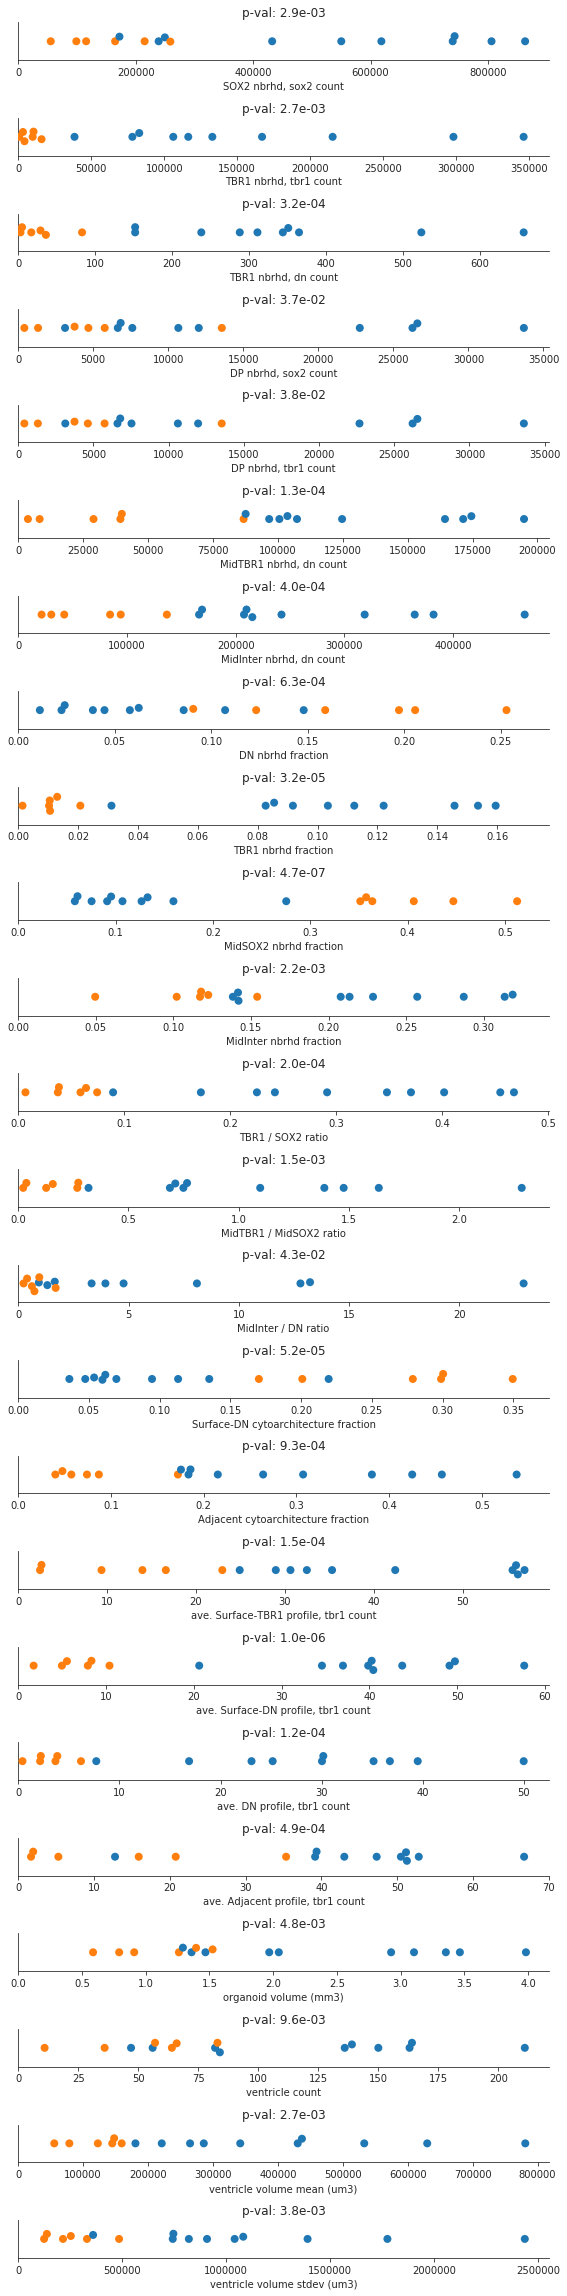

In [88]:
fig = plt.figure(figsize=(8, 32))

for i, f in enumerate(kept_feats):
    plt.subplot(len(kept_feats), 1, i+1)
    plt.title('p-val: {:.1e}'.format(df['pval'][f]))
    ax = sns.swarmplot(x=f, y='analysis', hue='type', data=df_hits, s=8, figure=fig)
    plt.legend().remove()
    xlim = ax.get_xlim()
    ax.get_yaxis().set_visible(False)
    plt.xlim([0, xlim[1]])
    sns.despine()

fig.tight_layout()
plt.show()

In [89]:
df_hits.drop(columns=['type', 'analysis']).to_numpy().shape

(16, 24)

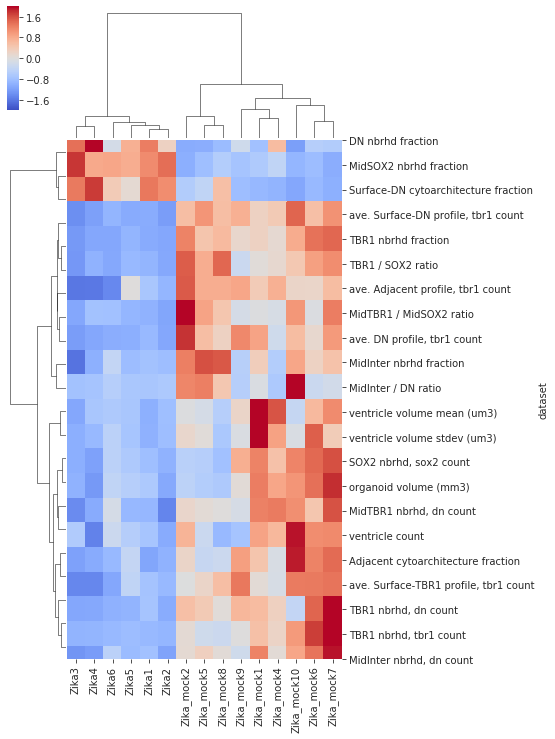

In [90]:
sns.clustermap(data=df_hits.drop(columns=['type', 'analysis']).drop(['Zika_mock3']).T.drop(['DP nbrhd, sox2 count', 'DP nbrhd, tbr1 count']), 
               method='ward', 
               z_score=0, 
               cmap='coolwarm', 
               vmin=-2,
               vmax=2,
               figsize=(6, 12))
plt.savefig(os.path.join(working_dir, 'clustermap_zika_hits.pdf'), bbox_inches='tight')
plt.show()

Radar plots

Cytoarchitecutre proportions

In [90]:
[print(f) for f in df.index]

DN nbrhd, sox2 count
DN nbrhd, tbr1 count
DN nbrhd, dn count
SOX2 nbrhd, sox2 count
SOX2 nbrhd, tbr1 count
SOX2 nbrhd, dn count
TBR1 nbrhd, sox2 count
TBR1 nbrhd, tbr1 count
TBR1 nbrhd, dn count
DP nbrhd, sox2 count
DP nbrhd, tbr1 count
DP nbrhd, dn count
MidTBR1 nbrhd, sox2 count
MidTBR1 nbrhd, tbr1 count
MidTBR1 nbrhd, dn count
MidSOX2 nbrhd, sox2 count
MidSOX2 nbrhd, tbr1 count
MidSOX2 nbrhd, dn count
MidInter nbrhd, sox2 count
MidInter nbrhd, tbr1 count
MidInter nbrhd, dn count
DN nbrhd fraction
SOX2 nbrhd fraction
TBR1 nbrhd fraction
DP nbrhd fraction
MidTBR1 nbrhd fraction
MidSOX2 nbrhd fraction
MidInter nbrhd fraction
TBR1 / SOX2 ratio
MidTBR1 / MidSOX2 ratio
MidInter / DN ratio
DN nbrhd, eq diam mean
DN nbrhd, eq diam stdev
SOX2 nbrhd, eq diam mean
SOX2 nbrhd, eq diam stdev
TBR1 nbrhd, eq diam mean
TBR1 nbrhd, eq diam stdev
DP nbrhd, eq diam mean
DP nbrhd, eq diam stdev
MidTBR1 nbrhd, eq diam mean
MidTBR1 nbrhd, eq diam stdev
MidSOX2 nbrhd, eq diam mean
MidSOX2 nbrhd, eq diam s

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [61]:
cyto_names = ['Surface-TBR1',
                 'Surface-DN',
                 'DN',
                 'Artifacts',
                 'Adjacent']
cyto_features = [f'{n} cytoarchitecture fraction' for n in cyto_names]

ctrl_cyto = df_ctrl.loc[cyto_features].mean(axis=1)
zikv_cyto = df_zikv.loc[cyto_features].mean(axis=1)

df_cyto = pd.DataFrame({'ctrl': ctrl_cyto,
                        'zikv': zikv_cyto})
# Optional
# df_cyto = df_cyto.drop('Surface2 cytoarchitecture fraction')

# df_cyto = df_cyto.drop('Artifacts cytoarchitecture fraction')
# df_cyto.loc['Surface cytoarchitecture fraction'] = df_cyto.loc['Surface1 cytoarchitecture fraction'] + \
#                                                    df_cyto.loc['Surface2 cytoarchitecture fraction']
# df_cyto = df_cyto.drop(['Surface1 cytoarchitecture fraction', 
#                         'Surface2 cytoarchitecture fraction',
#                         'Artifacts cytoarchitecture fraction'])
df_cyto

,ctrl,zikv
dataset,,
Surface-TBR1 cytoarchitecture fraction,0.227809,0.123155
Surface-DN cytoarchitecture fraction,0.089003,0.266518
DN cytoarchitecture fraction,0.368341,0.519663
Artifacts cytoarchitecture fraction,0.001622,0.010931
Adjacent cytoarchitecture fraction,0.313225,0.079733


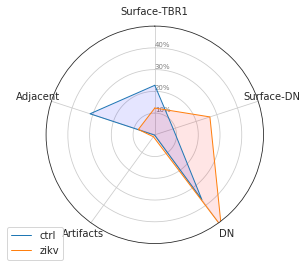

In [63]:
# number of variable
categories = list(df_cyto.index)
categories = [c.split()[0] for c in categories]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.10, 0.20, 0.30, 0.40], ["10%", "20%", "30%", "40%"], color="grey", size=7)
plt.ylim(0, 0.5)

# Ind1
values = list(df_cyto['ctrl'].values)
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="ctrl")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values = list(df_cyto['zikv'].values)
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="zikv")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

Feature heatmap / clustermap

In [64]:
df_imputed = df.fillna(method='backfill')

sns.clustermap(data=df_imputed, 
               method='ward', 
               z_score=0, 
               cmap='coolwarm', 
               vmin=-2,
               vmax=2,
               figsize=(4, 20))
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

# Feature correlations

In [166]:
from itertools import product
from scipy.stats import pearsonr

In [167]:
features = list(df_ctrl.index)
combinations = list(product(features, features))

len(combinations), len(features) ** 2

(75625, 75625)

In [168]:
corr = []
R = np.zeros((len(features), len(features)))
P = np.zeros((len(features), len(features)))
for combination in tqdm(combinations, total=len(combinations)):
    feat1 = combination[0]
    feat2 = combination[1]
    i = features.index(feat1)
    j = features.index(feat2)
    a = df_imputed.loc[feat1]
    b = df_imputed.loc[feat2]
    # remove nans
    keep = np.logical_and(~np.isnan(a), ~np.isnan(b))
    a = a[keep]
    b = b[keep]
    r, p = pearsonr(a, b)
#     if np.isclose(r, 1.0):
#         print(feat1 == feat2)
    corr.append(r)
    R[i, j] = r
    P[i, j] = p
corr = np.asarray(corr)

In [169]:
df_r = pd.DataFrame(R, index=features, columns=features)
df_r.head()

,"DN nbrhd, sox2 count","DN nbrhd, tbr1 count","DN nbrhd, dn count","SOX2 nbrhd, sox2 count","SOX2 nbrhd, tbr1 count","SOX2 nbrhd, dn count","TBR1 nbrhd, sox2 count","TBR1 nbrhd, tbr1 count","TBR1 nbrhd, dn count","DP nbrhd, sox2 count",...,"MidSOX2 nbrhd, tbr1 surface distance mean (um)","MidSOX2 nbrhd, tbr1 surface distance stdev (um)","MidSOX2 nbrhd, dn surface distance mean (um)","MidSOX2 nbrhd, dn surface distance stdev (um)","MidInter nbrhd, sox2 surface distance mean (um)","MidInter nbrhd, sox2 surface distance stdev (um)","MidInter nbrhd, tbr1 surface distance mean (um)","MidInter nbrhd, tbr1 surface distance stdev (um)","MidInter nbrhd, dn surface distance mean (um)","MidInter nbrhd, dn surface distance stdev (um)"
"DN nbrhd, sox2 count",1.000000,0.022224,0.000459,-0.284438,-0.118868,-0.072682,0.964733,-0.246007,-0.316390,0.026848,...,-0.405991,-0.350471,-0.099895,-0.072703,0.036099,-0.086483,-0.127701,-0.116680,0.101146,0.001841
"DN nbrhd, tbr1 count",0.022224,1.000000,0.137662,0.444397,0.546669,-0.162738,0.071006,0.202083,0.176366,0.077454,...,-0.376456,-0.263760,0.239552,0.297803,0.001058,0.164295,0.027875,0.086294,-0.024573,0.092933
"DN nbrhd, dn count",0.000459,0.137662,1.000000,0.399954,-0.264294,-0.292416,-0.068501,0.455564,0.314911,-0.467957,...,0.075535,0.066114,0.473503,0.564012,0.435550,0.665399,0.536277,0.690664,0.462392,0.646533
"SOX2 nbrhd, sox2 count",-0.284438,0.444397,0.399954,1.000000,0.553482,-0.076358,-0.224676,0.885014,0.558432,-0.023028,...,-0.097960,0.280027,0.288578,0.503890,0.337582,0.535651,0.523539,0.512167,0.331633,0.467741
"SOX2 nbrhd, tbr1 count",-0.118868,0.546669,-0.264294,0.553482,1.000000,0.045220,0.075087,0.289686,-0.024114,0.523291,...,-0.172493,0.073055,-0.150122,-0.020180,-0.259123,-0.073417,-0.133147,-0.103465,-0.276111,-0.161091


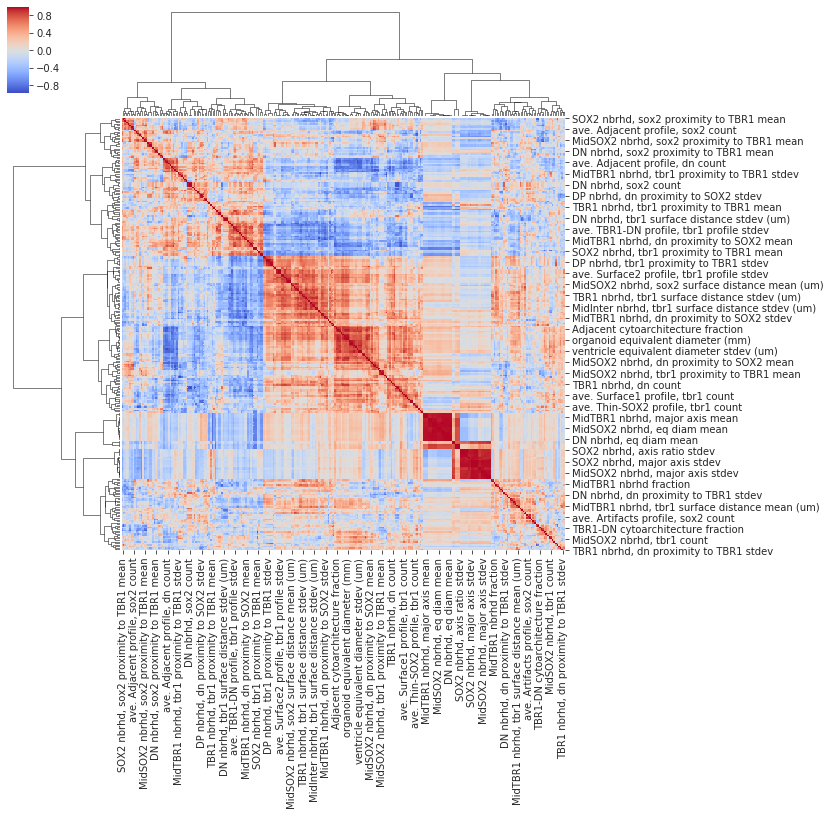

In [170]:
%matplotlib inline
cg = sns.clustermap(df_r, 
                    method='ward', 
                    metric='euclidean',
                    cmap='coolwarm')
plt.show()

In [65]:
for idx in cg.dendrogram_row.reordered_ind:
    print(features[idx])

NameError: name 'cg' is not defined

In [34]:
from scipy.cluster.hierarchy import dendrogram

In [ ]:
plt.figure(figsize=(9, 32))
ddata = dendrogram(cg.dendrogram_row.linkage,
                   color_threshold=7,
                   labels=features,
                   orientation='left',
                   leaf_font_size=12)

label_colors = {'Single-cell': 'b', 'Cytoarchitecture': 'r', 'Whole organoid': 'g'}
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    scale = df.loc[lbl.get_text()]['scale']
    lbl.set_color(label_colors[scale])
    
plt.tight_layout()
plt.show()

Negatively Correlated r < -0.99: 2
-0.991566464054111
	 ave. Artifacts profile, dn mean position
	 ave. ThinSOX2 profile, dn count
-0.991566464054111
	 ave. ThinSOX2 profile, dn count
	 ave. Artifacts profile, dn mean position
Positively Correlated r > 0.99: 22
0.9999993903322287
	 DP nbrhd, sox2 surface distance mean (um)
	 DP nbrhd, tbr1 surface distance mean (um)
0.9999993903322287
	 DP nbrhd, tbr1 surface distance mean (um)
	 DP nbrhd, sox2 surface distance mean (um)
0.9999949263530268
	 DP nbrhd, sox2 surface distance stdev (um)
	 DP nbrhd, tbr1 surface distance stdev (um)
0.9999949263530268
	 DP nbrhd, tbr1 surface distance stdev (um)
	 DP nbrhd, sox2 surface distance stdev (um)
0.999973869413585
	 DP nbrhd, tbr1 count
	 DP nbrhd, sox2 count
0.999973869413585
	 DP nbrhd, sox2 count
	 DP nbrhd, tbr1 count
0.9988928474960878
	 DP nbrhd, sox2 proximity to SOX2 mean
	 DP nbrhd, tbr1 proximity to SOX2 mean
0.9988928474960878
	 DP nbrhd, tbr1 proximity to SOX2 mean
	 DP nbrhd, sox2 pro

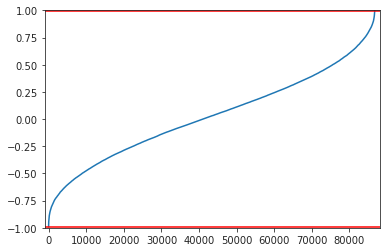

In [37]:
cutoff = 0.99

idx = np.argsort(corr)
comb_sorted = np.asarray(combinations)[idx]
corr_sorted = corr[idx]

# Remove combinations that are on the diagonal
keep_idx = np.asarray([i for i, (f1, f2) in enumerate(comb_sorted) if f1 != f2])
comb_sorted = comb_sorted[keep_idx]
corr_sorted = corr_sorted[keep_idx]

neg_idx = np.where(corr_sorted <= -cutoff)[0]
pos_idx = np.where(corr_sorted >= cutoff)[0]

neg_corr = corr_sorted[neg_idx]
neg_comb = comb_sorted[neg_idx]

pos_corr = corr_sorted[pos_idx[::-1]]
pos_comb = comb_sorted[pos_idx[::-1]]

print('Negatively Correlated r < -0.99:', len(neg_idx))
for n, c in zip(neg_corr, neg_comb):
    print(n)
    print("\t", c[0])
    print("\t", c[1])
    
print('Positively Correlated r > 0.99:', len(pos_idx))
for p, c in zip(pos_corr, pos_comb):
    print(p)
    print("\t", c[0])
    print("\t", c[1])

plt.plot(corr_sorted)
plt.plot([-1e4, len(corr) + 1e4], [cutoff, cutoff], 'r-')
plt.plot([-1e4, len(corr) + 1e4], [-cutoff, -cutoff], 'r-')
plt.ylim([-1, 1])
plt.xlim([-1e3, len(corr) + 1e3])
plt.show()

Look at correlations between features in two specific length scales

In [425]:
features1 = features[:cyto_start]
features2 = features[cyto_start:wholeorg_start]

combinations = list(product(features1, features2))
len(combinations)

6300

In [426]:
R = np.zeros((len(features1), len(features2)))
P = np.zeros((len(features1), len(features2)))
for combination in tqdm(combinations, total=len(combinations)):
    feat1 = combination[0]
    feat2 = combination[1]
    i = features1.index(feat1)
    j = features2.index(feat2)
    a = df.loc[feat1]
    b = df.loc[feat2]
    # remove nans
    keep = np.logical_and(~np.isnan(a), ~np.isnan(b))
    a = a[keep]
    b = b[keep]
    r, p = pearsonr(a, b)
    R[i, j] = r
    P[i, j] = p

In [ ]:
%matplotlib inline

df_r = pd.DataFrame(R, index=features1, columns=features2)

cg = sns.clustermap(df_r, 
                    method='average', 
                    metric='euclidean',
                    cmap='coolwarm',
                    figsize=(24, 24))
plt.tight_layout()
plt.show()

In [96]:
30 / (np.pi*(50/2)**2*50) * 1000**3

305577.49073643907